# COVID-19 Exploratory Analysis - Growth Rate among countries

This notebook analyses growth rates for COVID-19 per country.

COVID-19 cases data from [Our World in Data](www.ourworldindata.org)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import os
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, euclidean
from datetime import datetime


pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


In [2]:
data_dir = '../data/coronavirus/'

source_type = 'growth_rate_deaths'
# source_type = 'growth_rate'

df_orig = pd.read_csv(data_dir + '{}_country_normalized_period_1days.csv'.format(source_type)).set_index('Country')

# df_orig.columns = ['Country', 'Code', 'Day', 'Total']

df_orig

1    2     3    4    5     6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33      34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71       72        73        74        75        76        77       78        79        80        81       82        83
Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
Afghanistan                   NaN  NaN   NaN  NaN  NaN   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN     NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN      NaN       NaN
Albania                       NaN  NaN   NaN  1.0  1.0  1.00  1.000000  1.000000  1.000000  2.000000  1.000000  1.000000  1.000000  1.000000       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN     NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN      NaN       NaN
Algeria                       NaN  NaN   NaN  NaN  NaN   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  2.000000  1.000000  2.000000  1.000000  1.250000  1.200000  1.166667  1.428571  1.000000  1.500000       NaN       NaN       NaN       NaN       NaN       NaN       NaN     NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN 

## Analysis of correlation


In [3]:
df_orig.T.corr() #.dropna(how='all').dropna(axis=1)

Country                       Afghanistan   Albania   Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  Armenia  Australia   Austria  Azerbaijan  Bahamas   Bahrain  Bangladesh  Barbados  Belarus   Belgium  Benin  Bermuda  Bhutan  Bolivia  Bosnia and Herzegovina    Brazil  Brunei  Bulgaria  Burkina Faso  Cambodia  Cameroon    Canada  Cape Verde  Cayman Islands  Central African Republic  Chad  Chile     China  Colombia  Congo  Costa Rica  Cote d'Ivoire  Croatia  Cuba  Cyprus  Czech Republic  Democratic Republic of Congo   Denmark  Djibouti  Dominican Republic   Ecuador     Egypt  El Salvador  ...    Panama  Papua New Guinea  Paraguay      Peru  Philippines    Poland  Portugal  Qatar  Romania  Russia  Rwanda  Saint Lucia  San Marino  Saudi Arabia  Senegal  Serbia  Seychelles  Singapore  Slovakia  Slovenia  Somalia  South Africa  South Korea     Spain  Sri Lanka  Sudan  Suriname  Swaziland    Sweden  Switzerland    Taiwan  Tanzania  Thailand  Timor  Togo  Trinidad and Tobago  \
Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ...                                                                                                                                                                                                                                                                                                                                                                                                   
Afghanistan                           NaN       NaN       NaN      NaN     NaN                  NaN        NaN      NaN        NaN       NaN         NaN      NaN       NaN         NaN       NaN      NaN       NaN    NaN      NaN     NaN      NaN                     NaN       NaN     NaN       NaN           NaN       NaN       NaN       NaN         NaN             NaN                       NaN   NaN    NaN       NaN       NaN    NaN         NaN            NaN      NaN   NaN     NaN             NaN                           NaN       NaN       NaN                 NaN       NaN       NaN          NaN  ...       NaN               NaN       NaN       NaN          NaN       NaN       NaN    NaN      NaN     NaN     NaN          NaN         NaN           NaN      NaN     NaN         NaN        NaN       NaN       NaN      NaN           NaN          NaN       NaN        NaN    NaN       NaN        NaN       NaN          NaN       NaN       NaN       NaN    NaN   NaN                  NaN   
Albania                               NaN  1.000000       NaN      NaN     NaN                  NaN  -0.125000      NaN        NaN       NaN         NaN      NaN       NaN         NaN       NaN      NaN       NaN    NaN      NaN     NaN      NaN                     NaN       NaN     NaN -0.156174     -0.333333       NaN       NaN       NaN         NaN             NaN                       NaN   NaN    NaN       NaN       NaN    NaN         NaN            NaN      NaN   NaN     NaN             NaN                           NaN       NaN       NaN                 NaN       NaN       NaN          NaN  ... -0.111111               NaN       NaN       NaN          NaN -0.358610       NaN    NaN      NaN     NaN     NaN          NaN   -0.206349           NaN      NaN     NaN         NaN        NaN       NaN       NaN      NaN           NaN          NaN       NaN        NaN    NaN       NaN        NaN       NaN    -0.375000       NaN       NaN       NaN    NaN   NaN                  NaN   
Algeria     

## Country Analysis

The graphs below show the weekly growth rates for all countries. Line colors are based on the average temperatures (red -> warmer).

Colder countries seem to have, in general, higher rates.

In [4]:
country = 'Brazil'

total_days = int(df_orig.loc[country,].last_valid_index())

df_countries_ahead = df_orig.iloc[:, 0:total_days + 7]

df_countries_ahead[~df_countries_ahead.iloc[:, total_days + 7 - 1].isna()]

1   2   3   4   5   6   7   8   9  10  11   12   13   14   15   16   17   18   19   20   21        22   23        24        25        26        27        28        29        30        31        32        33
Country                                                                                                                                                                                                                     
China       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.5  1.0  2.0  2.833333  1.0  1.529412  1.576923  1.365854  1.446429  1.308642  1.245283  1.287879  1.252941  1.215962  1.173745
Egypt       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  1.000000  1.000000  1.000000  2.000000  1.000000  1.000000  1.000000  1.000000  2.000000  1.500000
France      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.000000  1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  2.000000
Italy       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  1.000000  3.000000  1.833333  1.090909  1.416667  1.235294  1.380952  1.206897  1.485714  1.538462
Japan       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN       NaN       NaN  1.000000  1.000000  1.000000  1.000000
South Korea NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  2.000000
Taiwan      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000

In [5]:


total_previous_days = 3

df_countries_ahead = df_orig.iloc[:, 0:total_days + 7]

df_countries_ahead = df_countries_ahead[~df_countries_ahead.iloc[:, total_days + 7 - 1].isna()] #df_orig.iloc[:, 0:total_days + 7].dropna()

df_countries_rate_norm = df_orig.iloc[:, total_days - total_previous_days:total_days].dropna()

df_countries_rate_norm = df_countries_rate_norm.loc[df_countries_ahead.index, :]

df_countries_rate_norm = df_countries_rate_norm.append(df_orig.loc[country,][total_days - total_previous_days:total_days])

df_countries_rate_norm

/home/luizcelso/bin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


24        25        26
Country                                  
China        1.529412  1.576923  1.365854
Egypt        1.000000  1.000000  1.000000
France       1.000000  1.000000  1.000000
Italy        1.000000  3.000000  1.833333
Japan             NaN       NaN       NaN
South Korea       NaN       NaN       NaN
Taiwan            NaN       NaN       NaN
Brazil       1.833333  1.636364  1.388889

In [6]:
distances = pd.DataFrame(
    squareform(pdist(df_countries_rate_norm)),
    columns = df_countries_rate_norm.index,
    index = df_countries_rate_norm.index
)

similar_countries = distances[country].sort_values()

similar_countries

Country
Brazil         0.000000
China          0.310535
Egypt          1.118319
France         1.118319
Italy          1.658758
Japan               NaN
South Korea         NaN
Taiwan              NaN
Name: Brazil, dtype: float64

In [7]:
top = 6 # number of similar countries to plot

df_total_cases = pd.read_csv(data_dir + 'total_cases_normalized.csv').set_index('Country')


df_total_cases_top = df_total_cases.loc[similar_countries.head(top).index,:]

df_total_cases_top

Date    Total  Day  TotalDeaths  DayNorm  GrowthRate  GrowthRateDeaths  DaysToDouble  DaysToDoubleDeaths
Country                                                                                                                
Brazil   2019-12-31      0.0    0          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-01      0.0    1          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-02      0.0    2          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-03      0.0    3          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-04      0.0    4          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-05      0.0    5          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-06      0.0    6          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-07      0.0    7          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-08      0.0    8          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-09      0.0    9          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-10      0.0   10          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-11      0.0   11          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-12      0.0   12          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-13      0.0   13          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-14      0.0   14          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-15      0.0   15          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-16      0.0   16          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-17      0.0   17          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-18      0.0   18          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-19      0.0   19          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-20      0.0   20          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-21      0.0   21          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-22      0.0   22          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-23      0.0   23          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-24      0.0   24          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-25      0.0   25          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-26      0.0   26          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-27      0.0   27          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-28      0.0   28          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-29      0.0   29          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-30      0.0   30          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-31      0.0   31          0.0      NaN

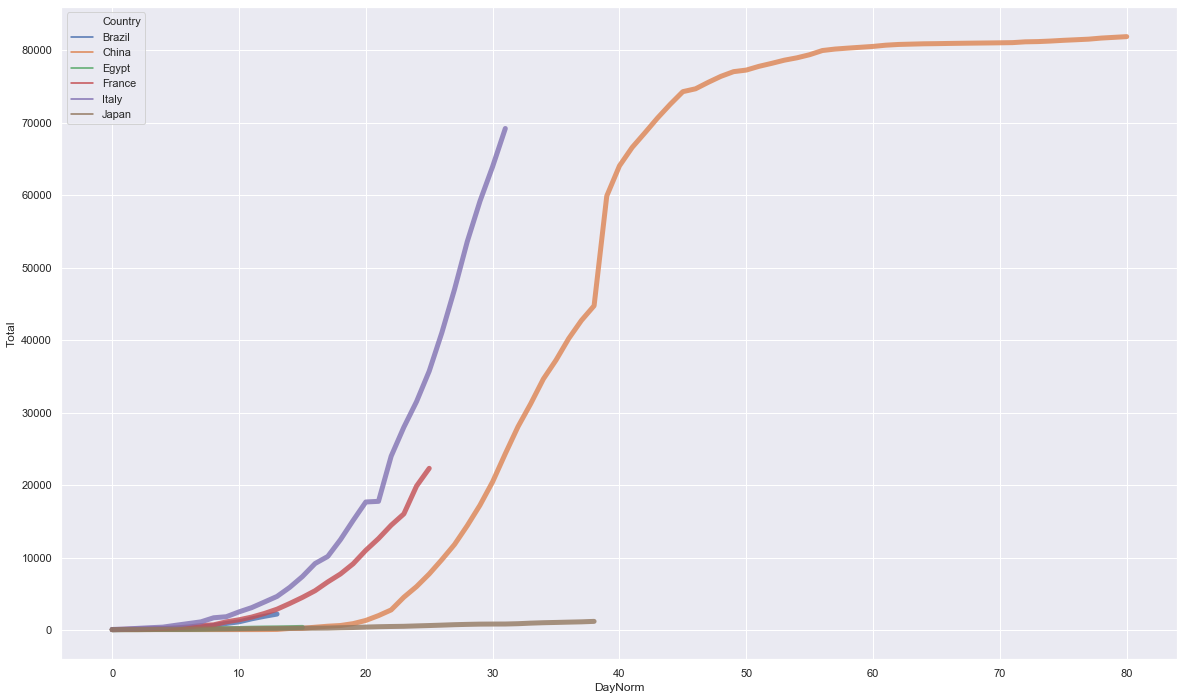

In [8]:
fig, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(x="DayNorm", y='Total', hue="Country", lw = 5, alpha = 0.8, data=df_total_cases_top.reset_index())



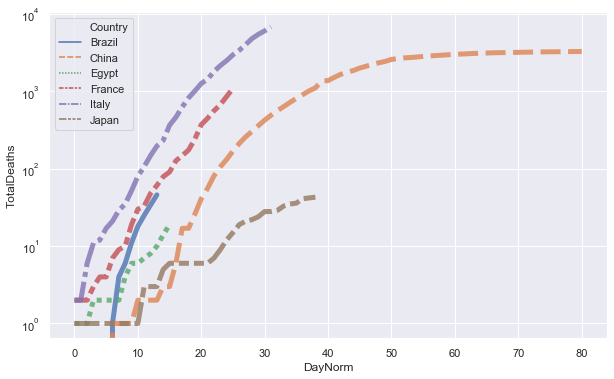

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x="DayNorm", y='TotalDeaths', hue="Country", style="Country", lw = 5, alpha = 0.8, data=df_total_cases_top.reset_index())

ax.set_yscale('log')

In [10]:
df_total_cases_top.sort_index()

Date    Total  Day  TotalDeaths  DayNorm  GrowthRate  GrowthRateDeaths  DaysToDouble  DaysToDoubleDeaths
Country                                                                                                                
Brazil   2019-12-31      0.0    0          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-01      0.0    1          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-02      0.0    2          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-03      0.0    3          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-04      0.0    4          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-05      0.0    5          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-06      0.0    6          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-07      0.0    7          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-08      0.0    8          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-09      0.0    9          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-10      0.0   10          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-11      0.0   11          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-12      0.0   12          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-13      0.0   13          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-14      0.0   14          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-15      0.0   15          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-16      0.0   16          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-17      0.0   17          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-18      0.0   18          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-19      0.0   19          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-20      0.0   20          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-21      0.0   21          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-22      0.0   22          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-23      0.0   23          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-24      0.0   24          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-25      0.0   25          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-26      0.0   26          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-27      0.0   27          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-28      0.0   28          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-29      0.0   29          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-30      0.0   30          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil   2020-01-31      0.0   31          0.0      NaN

In [11]:
date = datetime.today().strftime('%Y-%m-%d')

date

'2020-03-26'

(1, 6574.0)

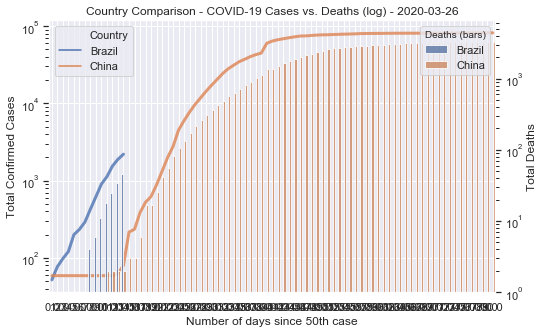

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title('Country Comparison - COVID-19 Cases vs. Deaths (log) - ' + date)

countries_to_show = similar_countries.iloc[:2].keys()

ax = sns.lineplot(x="DayNorm", y='Total', hue="Country", lw = 3, alpha = 0.8, data=df_total_cases_top.loc[countries_to_show,:].reset_index())

ax.set_yscale('log')

ax.set(ylabel='Total Confirmed Cases', xlabel='Number of days since 50th case')

ax2 = plt.twinx()

ax2.set_yscale('log')

ax2.grid(False)

sns.barplot(x="DayNorm", y='TotalDeaths', hue="Country", alpha = 0.8, ax=ax2, data=df_total_cases_top.loc[countries_to_show,:].reset_index())

ax2.legend(loc='upper right', frameon=True)

ax2.legend(loc='upper right', title = "Deaths (bars)", frameon=True)

ax2.set(ylabel='Total Deaths')

max_deaths = df_total_cases_top.loc[countries_to_show,:]['TotalDeaths'].max()

ax2.set_ylim(1, max_deaths * 2)

[Text(0, 0.5, 'Total Deaths')]

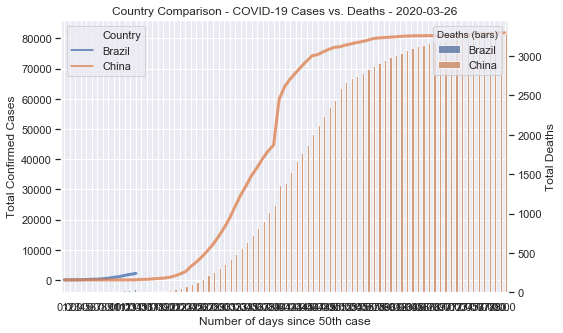

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title('Country Comparison - COVID-19 Cases vs. Deaths - ' + date)

countries_to_show = similar_countries.iloc[:2].keys()

ax = sns.lineplot(x="DayNorm", y='Total', hue="Country", lw = 3, alpha = 0.8, data=df_total_cases_top.loc[countries_to_show,:].reset_index())

# ax.set_yscale('log')

ax.set(ylabel='Total Confirmed Cases', xlabel='Number of days since 50th case')

ax2 = plt.twinx()

# ax2.set_yscale('log')

ax2.grid(False)

sns.barplot(x="DayNorm", y='TotalDeaths', hue="Country", alpha = 0.8, ax=ax2, data=df_total_cases_top.loc[countries_to_show,:].reset_index())

ax2.legend(loc='upper right', title = "Deaths (bars)", frameon=True)

ax2.set(ylabel='Total Deaths')

# ax2.set_ylim(0, max_deaths * 1.1)